# Intermediate Python for Data Science

## Chapter 5 - Case Study: Hacker Statistics

### Random Numbers

We are going to bring together a lot of what we have learned, along with a few new capabilities. We going to simulate a game where you are walking up the Empire State Building, based on the outcome of rolling a die 100 times. If you roll a 1 or a 2, you go one step down. If you roll 3, 4 or 5, you go one step up, if you roll a 6, you roll again and what the resulting number of steps up. 

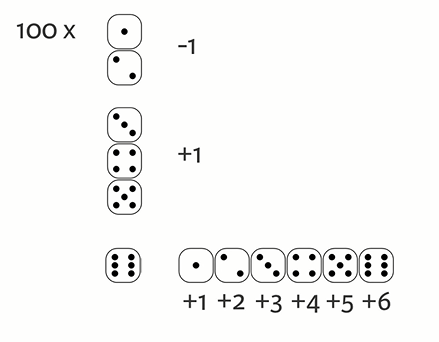

You have to allow that you can't go below step 0 and allow for 0.1% chance that you will fall down the stairs and you have to start again from step 0. You have a bet with your friend that you will reach 60 steps high. What is the chance you will win this bet? 

You could approach figuring out your chances by calcuting the result analytically or by simulating the process thousands of times and see, in what fraction of the simulations you reach 60 steps. This second approach of simulating the process is a form of Hacker Statistics. 

The first thing we need are random generators to simulate the throwing of the die. NumPy had a random package that provides a rand() function. The rand function creates a number between 0 and 1. 

In [1]:
import numpy as np
np.random.rand()

0.015024387707525122

Computer can generate pseudo-random numbers using a mathematical formula, starting from a random seed. The seed is chosen by Python when we call the rand() function. And we can also set it manually. Let's set the seed to 123.

In [2]:
np.random.seed(123)
np.random.rand()

0.6964691855978616

In [3]:
np.random.rand()

0.28613933495037946

If we reset the seed to 123 and call rand() again, we will get the same random numbers. This is why it's called pseudo-random. The numbers selected are random, but when a seed is selected, it is consistent between runs. This allows for a simulation to be reproduced.

In [4]:
np.random.seed(123)
print(np.random.rand())
print(np.random.rand())

0.6964691855978616
0.28613933495037946


To use the random package to simulate the coin toss, you call randint() function and pass it two arguments, first for the beginning of the random range and the second for the end of the random range. If we want to simulate a coin toss, you select a range of 0,2 as the 2 will be excluded.

In [6]:
np.random.seed(123)
coin = np.random.randint(0,2)
print(coin)

0


In [7]:
np.random.seed(123)
coin = np.random.randint(0,2)
print(coin)
if coin == 0 :
    print("heads")
else : 
    print('tails')

0
heads


### Exercise 1

#### Random float
Randomness has many uses in science, art, statistics, cryptography, gaming, gambling, and other fields. You're going to use randomness to simulate a game.<br>
<br>
All the functionality you need is contained in the random package, a sub-package of numpy. In this exercise, you'll be using two functions from this package:<br>
<br>
> seed(): sets the random seed, so that your results are reproducible between simulations. As an argument, it takes an integer of your choosing. If you call the function, no output will be generated.<br>
> rand(): if you don't specify any arguments, it generates a random float between zero and one.<br>

__Instructions:__
*  Import numpy as np.
*  Use seed() to set the seed; as an argument, pass 123.
*  Generate your first random float with rand() and print it out.

In [2]:
# Import numpy as np
import numpy as np

# Set the seed
np.random.seed(123)

# Generate and print random float
print(np.random.rand())

0.6964691855978616


#### Roll the dice
In the previous exercise, you used rand(), that generates a random float between 0 and 1.<br>
<br>
As Filip explained in the video you can just as well use randint(), also a function of the random package, to generate integers randomly. The following call generates the integer 4, 5, 6 or 7 randomly. 8 is not included.<br>
<br>
import numpy as np<br>
np.random.randint(4, 8)<br>
Numpy has already been imported as np and a seed has been set. Can you roll some dice?<br>

__Instructions:__
*  Use randint() with the appropriate arguments to randomly generate the integer 1, 2, 3, 4, 5 or 6. This simulates a dice. Print it out.
*  Repeat the outcome to see if the second throw is different. Again, print out the result.

In [1]:
# Import numpy and set seed
import numpy as np
np.random.seed(123)

# Use randint() to simulate a dice
print(np.random.randint(1,7))

# Use randint() again
print(np.random.randint(1,7))

6
3


#### Determine your next move
In the Empire State Building bet, your next move depends on the number of eyes you throw with the dice. We can perfectly code this with an if-elif-else construct!<br>
<br>
The sample code assumes that you're currently at step 50. Can you fill in the missing pieces to finish the script? numpy is already imported as np and the seed has been set to 123, so you don't have to worry about that anymore.<br>
<br>
__Instructions:__
* Roll the dice. Use randint() to create the variable dice.
* Finish the if-elif-else construct by replacing the blanks with:
> *  If dice is 1 or 2, you go one step down.
> *  if dice is 3, 4 or 5, you go one step up.
> *  Else, you throw the dice again. The number of eyes is the number of steps you go up.
>*  Print out dice and step. Given the value of dice, was step updated correctly?

In [3]:
# Numpy is imported, seed is set

# Starting step
step = 50

# Roll the dice
dice = np.random.randint(1,7)

# Finish the control construct
if dice <= 2 :
    step = step - 1
elif dice <= 5 :
    step = step + 1
else:
    step = step + np.random.randint(1,7)

# Print out dice and step
print(dice)
print(step)

3
51


### Random Walk

If you use the die to determine your step, you can call this a random step. If you use the die 100 times to determine your next step, you would have a series of random steps or in other words, a random walk. Random walk is a well known concept in science. For example, the path traced by a molecule traveling in a liquid or a gas can be modeled as a random walk. The final status of gambler is another example. 

You will use a list with a for loop to record every step in your random walk. 

In [14]:
import numpy as np
np.random.seed(123)

outcomes = []

for x in range(10) :
    coin = np.random.randint(0,2)
    if coin == 0 :
        outcomes.append('heads')
    else : 
        outcomes.append('tails')

print(outcomes)

['heads', 'tails', 'heads', 'heads', 'heads', 'heads', 'heads', 'tails', 'tails', 'heads']


The outcome is a list of random steps, but it is not a random walk because each outcome is not based on the previous step. It's just a bunch of random steps. You can turn this into a random walk by tracking the total number of tails while you are simulating a game. In this case you create a list to track the number of tails. If a 1 is thrown, then the tails list is incremented by 1 by adding the value of tails to the list.

In [30]:
tails = [0]
np.random.seed(123)
for x in range(10) : 
    coin = np.random.randint(0,2)
    tails.append(tails[x] + coin)
print(tails)

[0, 0, 1, 1, 1, 1, 1, 1, 2, 3, 3]


If you compare the numbers in the output above to the outcome of printing heads or tails, you can see the that the number of tails is incremented by one every time it shows that at tails was thrown. 
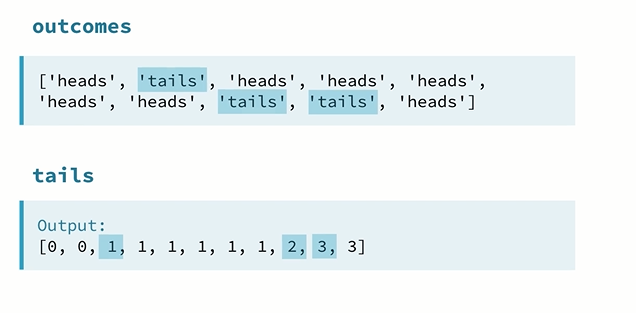

This is exactly how a bunch of random steps are converted to a random walk.

### Exercise 2

#### The next step
Before, you have already written Python code that determines the next step based on the previous step. Now it's time to put this code inside a for loop so that we can simulate a random walk.<br>
<br>
__Instructions:__
* Make a list random_walk that contains the first step, which is the integer 0.
*  Finish the for loop:
> *  The loop should run 100 times.
> *  On each iteration, set step equal to the last element in the random_walk list. You can use the index -1 for this.
> *  Next, let the if-elif-else construct update step for you.
> *  The code that appends step to random_walk is already coded.
> *  Print out random_walk.

In [4]:
# Numpy is imported, seed is set

# Initialize random_walk
random_walk = [0]

# Complete the ___
for x in range(100) :
    # Set step: last element in random_walk
    step = random_walk[-1]

    # Roll the dice
    dice = np.random.randint(1,7)

    # Determine next step
    if dice <= 2:
        step = step - 1
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    # append next_step to random_walk
    random_walk.append(step)

# Print random_walk
print(random_walk)

[0, 1, 2, 1, 2, 3, 4, 3, 2, 1, 0, -1, -2, -3, -4, -3, 2, 1, 0, 1, 0, 1, 2, 3, 4, 5, 4, 5, 4, 5, 6, 7, 8, 7, 11, 12, 11, 12, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 29, 30, 34, 35, 34, 35, 36, 35, 36, 37, 39, 40, 41, 40, 39, 40, 41, 40, 39, 40, 41, 43, 42, 41, 42, 41, 42, 43, 44, 46, 45, 46, 47, 48, 49, 50, 49, 48, 49, 48, 49, 50, 49, 52, 53, 54, 55, 54, 55, 56, 60]


#### How low can you go?
Things are shaping up nicely! You already have code that calculates your location in the Empire State Building after 100 dice throws. However, there's something we haven't thought about - you can't go below 0!<br>
<br>
A typical way to solve problems like this is by using max(). If you pass max() two arguments, the biggest one gets returned. For example, to make sure that a variable x never goes below 10 when you decrease it, you can use:<br>
<br>
x = max(10, x - 1)<br>
<br>
__Instructions:__
*  Use max() in a similar way to make sure that step doesn't go below zero if dice <= 2.
*  Hit Submit Answer and check the contents of random_walk.

In [5]:
# Numpy is imported, seed is set

# Initialize random_walk
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        # Replace below: use max to make sure step can't go below 0
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, 0, 0, 2, 1, 2, 4, 5, 6, 11, 10, 11, 12, 13, 14, 15, 14, 19, 20, 21, 22, 21, 20, 19, 18, 17, 18, 19, 20, 26, 25, 24, 23, 24, 25, 26, 25, 26, 27, 26, 31, 32, 31, 30, 29, 28, 29, 28, 27, 29, 30, 33, 34, 36, 37, 38, 39, 38, 37, 38, 39, 40, 41, 40, 41, 42, 43, 46, 47, 48, 47, 48, 47, 48, 49, 50, 54, 53, 52, 53, 54, 55, 54, 55, 54, 55, 57, 62, 61, 62, 63, 64, 65, 66, 67, 66, 67, 68, 69, 71, 73]


#### Visualize the walk
Let's visualize this random walk! Remember how you could use matplotlib to build a line plot?<br>
<br>
import matplotlib.pyplot as plt<br>
plt.plot(x, y)<br>
plt.show()<br>

The first list you pass is mapped onto the x axis and the second list is mapped onto the y axis.<br>
<br>
If you pass only one argument, Python will know what to do and will use the index of the list to map onto the x axis, and the values in the list onto the y axis.<br>

__Instructions:__
* Add some lines of code after the for loop:
> * Import matplotlib.pyplot as plt.
> * Use plt.plot() to plot random_walk.
>* Finish off with plt.show() to actually display the plot

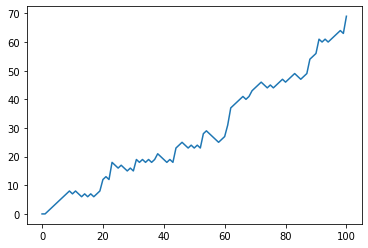

In [7]:
# Numpy is imported, seed is set

# Initialization
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

### Distribution
The goal of this project is to determine what is the likelihood that you will be able to reach step 60. If you simulate the game 10,000 times, you get 10,000 steps and this is actually a distribution of final steps. And once you know the distribution, you can start calculating chances. 

Using the coin toss example, you create a distribution by doing the 10 times coin toss over and over again and capture the outcomes in the an overall list that will represent the random walk. 

In [37]:
np.random.seed(123)
final_tails = []
for x in range(100) :
    tails = [0]
    for x in range(10):
        coin = np.random.randint(0,2)
        tails.append(tails[x] + coin)
    final_tails.append(tails[-1])
print(final_tails)

[3, 6, 4, 5, 4, 5, 3, 5, 4, 6, 6, 8, 6, 4, 7, 5, 7, 4, 3, 3, 4, 5, 8, 5, 6, 5, 7, 6, 4, 5, 8, 5, 8, 4, 6, 6, 3, 4, 5, 4, 7, 8, 9, 4, 3, 4, 5, 6, 4, 2, 6, 6, 5, 7, 5, 4, 5, 5, 6, 7, 6, 6, 6, 3, 6, 3, 6, 5, 6, 5, 6, 4, 6, 6, 3, 4, 4, 2, 4, 5, 4, 6, 6, 6, 8, 4, 6, 5, 7, 4, 6, 5, 4, 6, 7, 3, 7, 4, 5, 7]


You see that the final_tails output contains numbers between 0 and 10. Each number is the number of tails that were thrown in the 10 times the coin toss was completed. All these values represent the distribution of the number of times tails was thrown. To visualize a distribution, you will want to use a histogram.

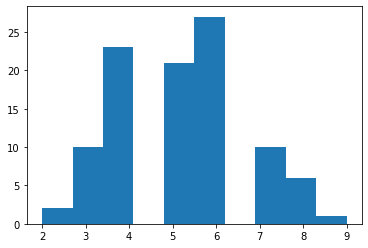

In [39]:
import matplotlib.pyplot as plt
np.random.seed(123)
final_tails = []
for x in range(100) :
    tails = [0]
    for x in range(10):
        coin = np.random.randint(0,2)
        tails.append(tails[x] + coin)
    final_tails.append(tails[-1])

plt.hist(final_tails, bins = 10)
plt.show()

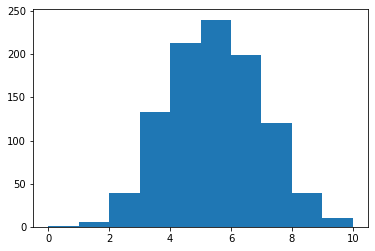

In [40]:
#Change the range in the top level for loop to 1000 to smooth out the histogram
import matplotlib.pyplot as plt
np.random.seed(123)
final_tails = []
for x in range(1000) :
    tails = [0]
    for x in range(10):
        coin = np.random.randint(0,2)
        tails.append(tails[x] + coin)
    final_tails.append(tails[-1])

plt.hist(final_tails, bins = 10)
plt.show()

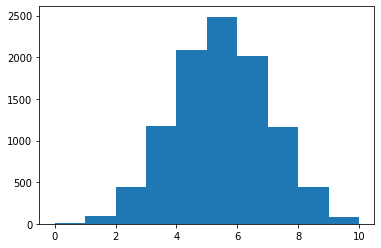

In [41]:
#Change the code to run 10,000 times.
import matplotlib.pyplot as plt
np.random.seed(123)
final_tails = []
for x in range(10000) :
    tails = [0]
    for x in range(10):
        coin = np.random.randint(0,2)
        tails.append(tails[x] + coin)
    final_tails.append(tails[-1])

plt.hist(final_tails, bins = 10)
plt.show()

Now we see more of a bell shaped curve and starts to look like a theoretical distribution or the distribution you would find by doing analytical, pen and paper calculations.

### Exercise 3
#### Simulate multiple walks
A single random walk is one thing, but that doesn't tell you if you have a good chance at winning the bet.<br>
<br>
To get an idea about how big your chances are of reaching 60 steps, you can repeatedly simulate the random walk and collect the results. That's exactly what you'll do in this exercise.<br>
<br>
The sample code already sets you off in the right direction. Another for loop is wrapped around the code you already wrote. It's up to you to add some bits and pieces to make sure all of the results are recorded correctly.<br>
<br>
Note: Don't change anything about the initialization of all_walks that is given. Setting any number inside the list will cause the exercise to crash!

__Instructions:__
*  Fill in the specification of the for loop so that the random walk is simulated 10 times.
*  After the random_walk array is entirely populated, append the array to the all_walks list.
*  Finally, after the top-level for loop, print out all_walks.

In [42]:
np.random.seed(123)
all_walks = []

for i in range(10):
    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)
    all_walks.append(random_walk)

print(all_walks)

[[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60], [0, 4, 3, 2, 4, 3, 4, 6, 7, 8, 13, 12, 13, 14, 15, 16, 17, 16, 21, 22, 23, 24, 23, 22, 21, 20, 19, 20, 21, 22, 28, 27, 26, 25, 26, 27, 28, 27, 28, 29, 28, 33, 34, 33, 32, 31, 30, 31, 30, 29, 31, 32, 35, 36, 38, 39, 40, 41, 40, 39, 40, 41, 42, 43, 42, 43, 44, 45, 48, 49, 50, 49, 50, 49, 50, 51, 52, 56, 55, 54, 55, 56, 57, 56, 57, 56, 57, 59, 64, 63, 64, 65, 66, 67, 68, 69, 68, 69, 70, 71, 73], [0, 2, 1, 2, 3, 6, 5, 6, 5, 6, 7, 8, 7, 8, 7, 8, 9, 11, 10, 9, 10, 11, 10, 12, 13, 14, 15, 16, 17, 18, 17, 18, 19, 24, 25, 24, 23, 22, 21, 22, 23, 24, 29, 30, 29, 30, 31, 32, 33, 34, 35, 34, 33, 34, 33, 39, 38, 39, 38, 39, 38, 3

#### Visualize all walks
all_walks is a list of lists: every sub-list represents a single random walk. If you convert this list of lists to a Numpy array, you can start making interesting plots! matplotlib.pyplot is already imported as plt.<br>
<br>
The nested for loop is already coded for you - don't worry about it. For now, focus on the code that comes after this for loop.<br>

__Instructions:__
*  Use np.array() to convert all_walks to a Numpy array, np_aw.
*  Try to use plt.plot() on np_aw. Also include plt.show(). Does it work out of the box?
*  Transpose np_aw by calling np.transpose() on np_aw. Call the result np_aw_t. Now every row in np_all_walks represents the position after 1 throw for the 10 random walks.
* Use plt.plot() to plot np_aw_t; also include a plt.show(). Does it look better this time?

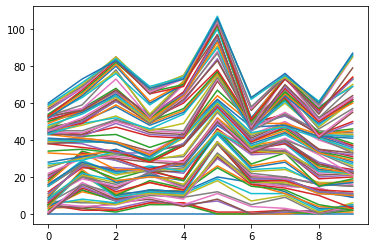

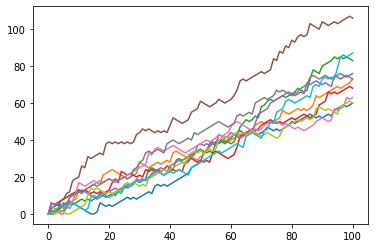

In [45]:
np.random.seed(123)

# initialize and populate all_walks
all_walks = []

for x in range(10) :
    random_walk = [0]
    for x in range(100) : 
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2 :
            step = max(0, step - 1)
        elif dice <= 5 :
            step = step + 1
        else: 
            step = step + np.random.randint(1,7)
        random_walk.append(step)
    all_walks.append(random_walk)

#Convert all_walks to NumPy array: np_aw
np_aw = np.array(all_walks)

#Plot and show np_aw
plt.plot(np_aw)
plt.show()

#Transpose np_aw: np_aw_t - Now every row in np_all_walks represents the position after 1 throw for the 10 random walks.
np_aw_t = np.transpose(np_aw)
plt.plot(np_aw_t)
plt.show()

#### Implement clumsiness
With this neatly written code of yours, changing the number of times the random walk should be simulated is super-easy. You simply update the range() function in the top-level for loop.<br>
<br>
There's still something we forgot! You're a bit clumsy and you have a 0.1% chance of falling down. That calls for another random number generation. Basically, you can generate a random float between 0 and 1. If this value is less than or equal to 0.001, you should reset step to 0.

__Instructions:__
*  Change the range() function so that the simulation is performed 250 times.
*  Finish the if condition so that step is set to 0 if a random float is less or equal to 0.001. Use np.random.rand().

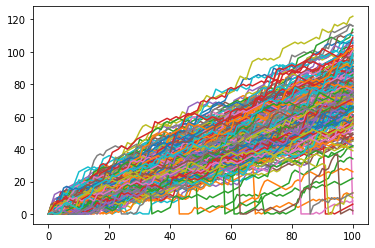

In [50]:
np.random.seed(123)
all_walks = []

# Simulate random walk 250 times
for i in range(250) : 
    random_walk = [0]
    for x in range(100):
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
    
        #Implement clumsiness
        if np.random.rand() <= .001 :
            step = 0
        
        random_walk.append(step)
    all_walks.append(random_walk)

#Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

#### Plot the distribution
All these fancy visualizations have put us on a sidetrack. We still have to solve the million-dollar problem: What are the odds that you'll reach 60 steps high on the Empire State Building?<br>
<br>
Basically, you want to know about the end points of all the random walks you've simulated. These end points have a certain distribution that you can visualize with a histogram.<br>
<br>
Note that if your code is taking too long to run, you might be plotting a histogram of the wrong data!

__Instructions:__
*  To make sure we've got enough simulations, go crazy. Simulate the random walk 500 times.
*  From np_aw_t, select the last row. This contains the endpoint of all 500 random walks you've simulated. Store this Numpy array as ends.
*  Use plt.hist() to build a histogram of ends. Don't forget plt.show() to display the plot

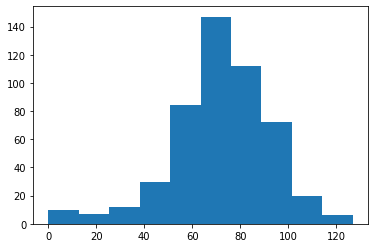

In [64]:
# Simulate random walk 500 times
np.random.seed(123)
ends_list = []
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    ends_list.append(random_walk[-1])
    all_walks.append(random_walk)

ends = np.array(ends_list)
# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1,]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

In [58]:
#Behind the scenes work to create the ends array

np.random.seed(123)
ends_list = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    ends_list.append(random_walk[-1])
ends = np.array(ends_list)

#### Calculate the odds
The histogram of the previous exercise was created from a Numpy array ends, that contains 500 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, you can count the number of integers in ends that are greater than or equal to 60 and divide that number by 500, the total number of simulations.

Well then, what's the estimated chance that you'll reach 60 steps high if you play this Empire State Building game?

In [68]:
mas60 = ends[ends>=60]
odds = len(mas60)/500
print("the odds of getting to step 60 or above are: " + str(odds))

the odds of getting to step 60 or above are: 0.784
